# Demo

This demo demonstrate how to train various (semi-supervised) Neural NMF models and how to analyze and visualize the result.

In [1]:
# loading packages and functions
import torch
import numpy as np
import scipy.io
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline
#import Ipynb_importer

import sys
sys.path.insert(1, '../src')
from neural_nmf import Neural_NMF, Energy_Loss_Func, L21_Norm, Recon_Loss_Func
from lsqnonneg_module import LsqNonneg
from train import train_unsupervised, train_supervised
from writer import Writer

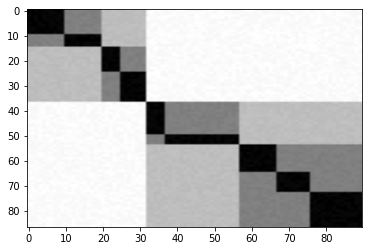

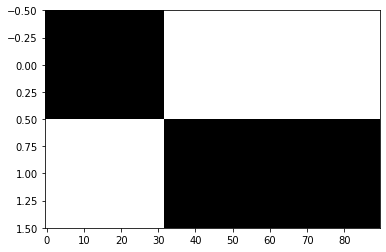

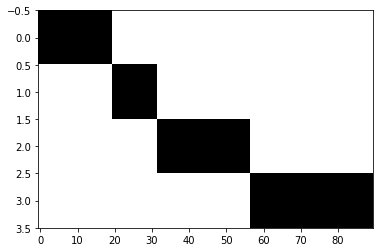

In [2]:
# data loading 
data = scipy.io.loadmat('synthetic_noise.mat')
X = data['X']
X = Variable(torch.from_numpy(X).double())
Y2 = data['Y2']
Y2 = Variable(torch.from_numpy(Y2).double())
Y4 = data['Y4']
Y4 = Variable(torch.from_numpy(Y4).double())
Y9 = data['Y9']
Y9 = Variable(torch.from_numpy(Y9).double())
L0 = data['L0']
L0 = Variable(torch.from_numpy(L0).double())
L10 = data['L10']
L10 = Variable(torch.from_numpy(L10).double())
L20 = data['L20']
L20 = Variable(torch.from_numpy(L20).double())
L30 = data['L30']
L30 = Variable(torch.from_numpy(L30).double())
L40 = data['L40']
L40 = Variable(torch.from_numpy(L40).double())
L50 = data['L50']
L50 = Variable(torch.from_numpy(L50).double())
L60 = data['L60']
L60 = Variable(torch.from_numpy(L60).double())
L70 = data['L70']
L70 = Variable(torch.from_numpy(L70).double())
L80 = data['L80']
L80 = Variable(torch.from_numpy(L80).double())
L90 = data['L90']
L90 = Variable(torch.from_numpy(L90).double())
labels9 = data['labels9']
labels9 = Variable(torch.from_numpy(labels9).long())
labels9 = torch.reshape(labels9,[90])
labels4 = data['labels4']
labels4 = Variable(torch.from_numpy(labels4).long())
labels4 = torch.reshape(labels4,[90])
labels2 = data['labels2']
labels2 = Variable(torch.from_numpy(labels2).long())
labels2 = torch.reshape(labels2,[90])
plt.imshow(X,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y2,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y4,aspect='auto',cmap='binary')
plt.show()

In [3]:
# set the network parameters
m = X.shape[0]
k1 = 9
k2 = 4
k3 = 2

## Unsupervised One-Layer

In [4]:
net = Neural_NMF([m, k1])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.0403, dtype=torch.float64)
epoch =  2000 
 tensor(0.0323, dtype=torch.float64)
epoch =  3000 
 tensor(0.0249, dtype=torch.float64)
epoch =  4000 
 tensor(0.0094, dtype=torch.float64)
epoch =  5000 
 tensor(0.0037, dtype=torch.float64)
epoch =  6000 
 tensor(0.0017, dtype=torch.float64)
epoch =  7000 
 tensor(0.0015, dtype=torch.float64)
epoch =  8000 
 tensor(0.0015, dtype=torch.float64)
epoch =  9000 
 tensor(0.0015, dtype=torch.float64)
epoch =  10000 
 tensor(0.0015, dtype=torch.float64)


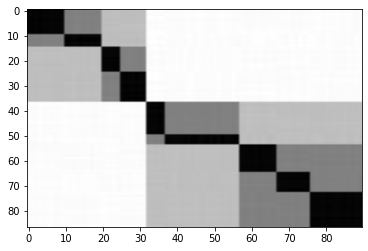

In [5]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

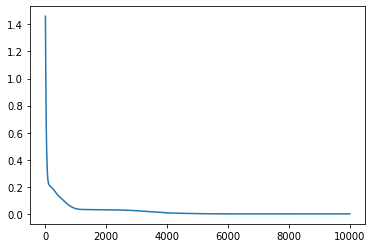

In [6]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Unsupervised Two-Layer

In [7]:
net = Neural_NMF([m, k1,k2])
X_input = X
history_unsupervised = train_unsupervised(net, X_input, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.2938, dtype=torch.float64)
epoch =  2000 
 tensor(0.2855, dtype=torch.float64)
epoch =  3000 
 tensor(0.2853, dtype=torch.float64)
epoch =  4000 
 tensor(0.2853, dtype=torch.float64)
epoch =  5000 
 tensor(0.2853, dtype=torch.float64)
epoch =  6000 
 tensor(0.2852, dtype=torch.float64)
epoch =  7000 
 tensor(0.2852, dtype=torch.float64)
epoch =  8000 
 tensor(0.2852, dtype=torch.float64)
epoch =  9000 
 tensor(0.2852, dtype=torch.float64)
epoch =  10000 
 tensor(0.2852, dtype=torch.float64)


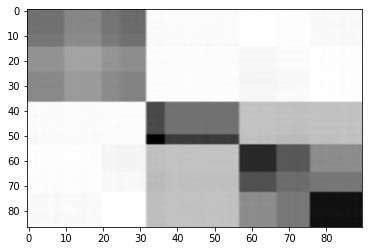

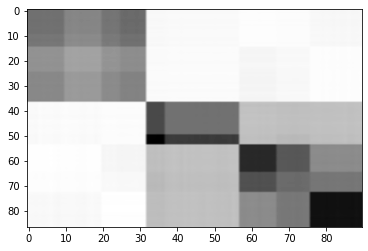

In [8]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')

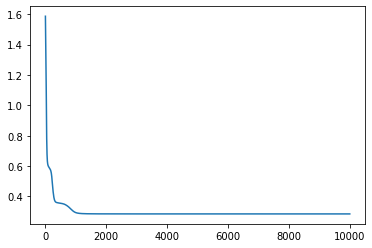

In [9]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Unsupervised Three-Layer

In [10]:
net = Neural_NMF([m, k1, k2, k3])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.1615, dtype=torch.float64)
epoch =  2000 
 tensor(0.1277, dtype=torch.float64)
epoch =  3000 
 tensor(0.1111, dtype=torch.float64)
epoch =  4000 
 tensor(0.1019, dtype=torch.float64)
epoch =  5000 
 tensor(0.0964, dtype=torch.float64)
epoch =  6000 
 tensor(0.0927, dtype=torch.float64)
epoch =  7000 
 tensor(0.0901, dtype=torch.float64)
epoch =  8000 
 tensor(0.0884, dtype=torch.float64)
epoch =  9000 
 tensor(0.0870, dtype=torch.float64)
epoch =  10000 
 tensor(0.0859, dtype=torch.float64)


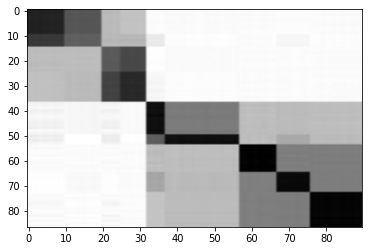

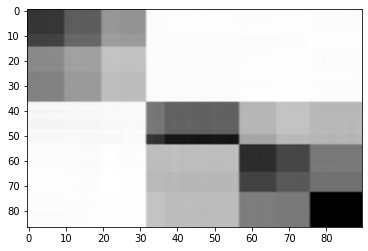

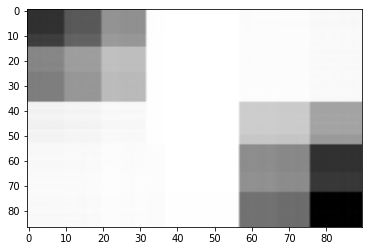

In [11]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
A3 = history_unsupervised.get('A3')
S3 = history_unsupervised.get('S3')
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

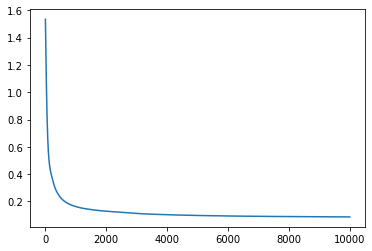

In [12]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Supervised One-Layer

In [13]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
net.linear.weight.data = torch.rand(c,k1,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.0894, dtype=torch.float64)
epoch =  2000 
 tensor(0.0185, dtype=torch.float64)
epoch =  3000 
 tensor(0.0148, dtype=torch.float64)
epoch =  4000 
 tensor(0.0148, dtype=torch.float64)
epoch =  5000 
 tensor(0.0148, dtype=torch.float64)
epoch =  6000 
 tensor(0.0148, dtype=torch.float64)
epoch =  7000 
 tensor(0.0148, dtype=torch.float64)
epoch =  8000 
 tensor(0.0148, dtype=torch.float64)
epoch =  9000 
 tensor(0.0147, dtype=torch.float64)
epoch =  10000 
 tensor(0.0147, dtype=torch.float64)


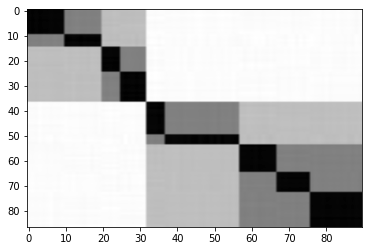

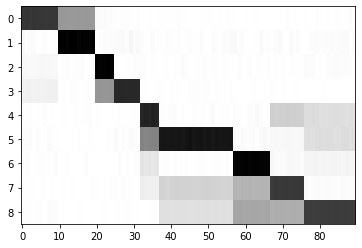

In [14]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

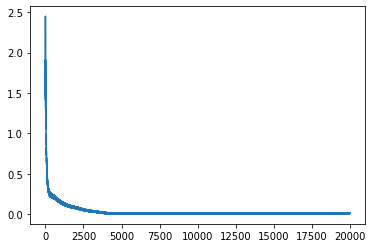

In [15]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Two-Layer

In [16]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
#net.linear.weight.data = torch.rand(c,k2,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.1691, dtype=torch.float64)
epoch =  2000 
 tensor(0.1183, dtype=torch.float64)
epoch =  3000 
 tensor(0.0869, dtype=torch.float64)
epoch =  4000 
 tensor(0.0760, dtype=torch.float64)
epoch =  5000 
 tensor(0.0712, dtype=torch.float64)
epoch =  6000 
 tensor(0.0690, dtype=torch.float64)
epoch =  7000 
 tensor(0.0672, dtype=torch.float64)
epoch =  8000 
 tensor(0.0657, dtype=torch.float64)
epoch =  9000 
 tensor(0.0645, dtype=torch.float64)
epoch =  10000 
 tensor(0.0635, dtype=torch.float64)


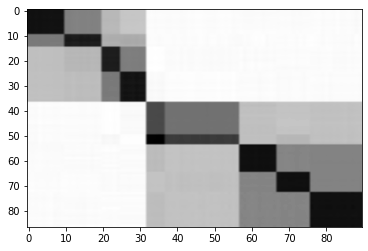

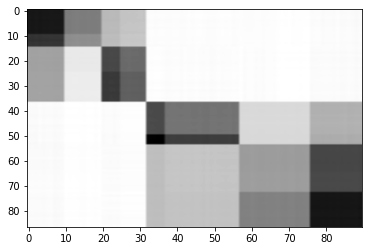

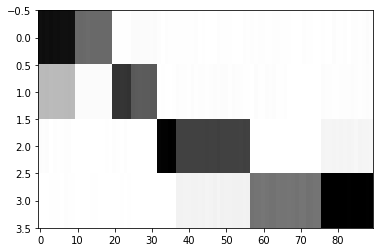

In [17]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

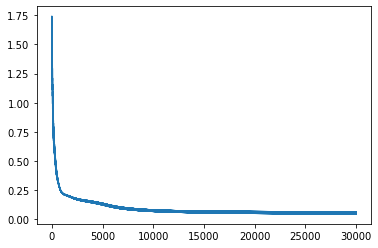

In [18]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer

In [19]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.2777, dtype=torch.float64)
epoch =  2000 
 tensor(0.2727, dtype=torch.float64)
epoch =  3000 
 tensor(0.2662, dtype=torch.float64)
epoch =  4000 
 tensor(0.2475, dtype=torch.float64)
epoch =  5000 
 tensor(0.2277, dtype=torch.float64)
epoch =  6000 
 tensor(0.2235, dtype=torch.float64)
epoch =  7000 
 tensor(0.2233, dtype=torch.float64)
epoch =  8000 
 tensor(0.2238, dtype=torch.float64)
epoch =  9000 
 tensor(0.2244, dtype=torch.float64)
epoch =  10000 
 tensor(0.2247, dtype=torch.float64)


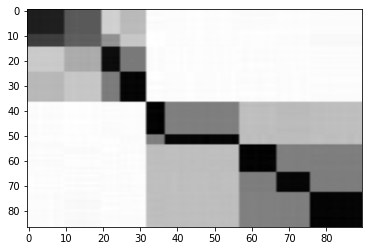

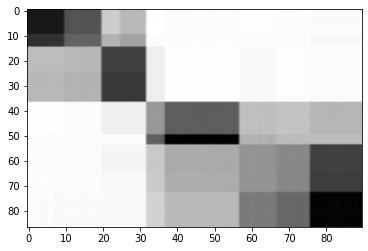

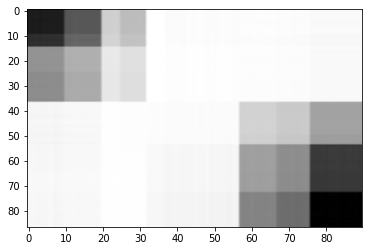

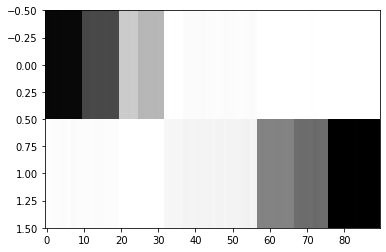

In [20]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

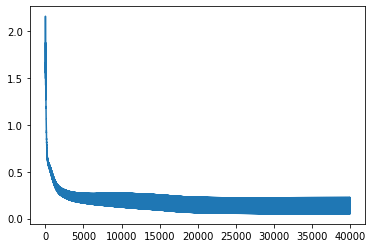

In [21]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised One-Layer (Cross-Entropy)

In [22]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.1584, dtype=torch.float64)
epoch =  2000 
 tensor(0.0785, dtype=torch.float64)
epoch =  3000 
 tensor(0.0029, dtype=torch.float64)
epoch =  4000 
 tensor(0.0022, dtype=torch.float64)
epoch =  5000 
 tensor(0.0020, dtype=torch.float64)
epoch =  6000 
 tensor(0.0019, dtype=torch.float64)
epoch =  7000 
 tensor(0.0019, dtype=torch.float64)
epoch =  8000 
 tensor(0.0018, dtype=torch.float64)
epoch =  9000 
 tensor(0.0018, dtype=torch.float64)
epoch =  10000 
 tensor(0.0018, dtype=torch.float64)


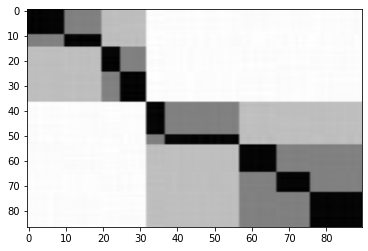

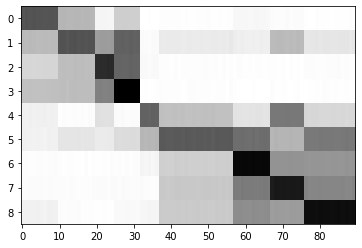

In [23]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

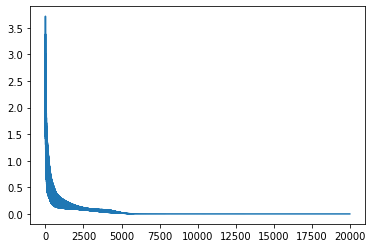

In [24]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Two-Layer (Cross-Entropy)

In [25]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.4009, dtype=torch.float64)
epoch =  2000 
 tensor(0.3537, dtype=torch.float64)
epoch =  3000 
 tensor(0.3332, dtype=torch.float64)
epoch =  4000 
 tensor(0.3250, dtype=torch.float64)
epoch =  5000 
 tensor(0.3133, dtype=torch.float64)
epoch =  6000 
 tensor(0.3009, dtype=torch.float64)
epoch =  7000 
 tensor(0.2955, dtype=torch.float64)
epoch =  8000 
 tensor(0.2922, dtype=torch.float64)
epoch =  9000 
 tensor(0.2902, dtype=torch.float64)
epoch =  10000 
 tensor(0.2882, dtype=torch.float64)


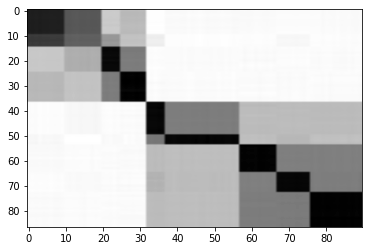

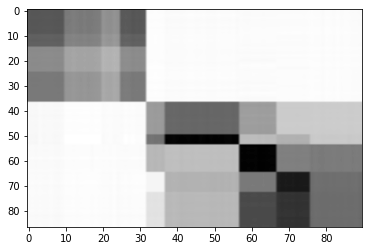

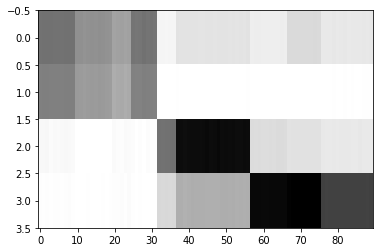

In [26]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

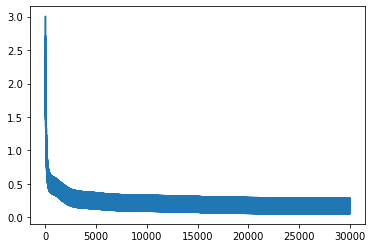

In [27]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer (Cross-Entropy)

In [28]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.3486, dtype=torch.float64)
epoch =  2000 
 tensor(0.2941, dtype=torch.float64)
epoch =  3000 
 tensor(0.2652, dtype=torch.float64)
epoch =  4000 
 tensor(0.2456, dtype=torch.float64)
epoch =  5000 
 tensor(0.2385, dtype=torch.float64)
epoch =  6000 
 tensor(0.2306, dtype=torch.float64)
epoch =  7000 
 tensor(0.2271, dtype=torch.float64)
epoch =  8000 
 tensor(0.2260, dtype=torch.float64)
epoch =  9000 
 tensor(0.2223, dtype=torch.float64)
epoch =  10000 
 tensor(0.2185, dtype=torch.float64)


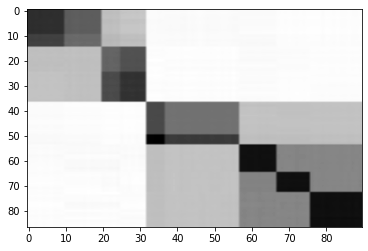

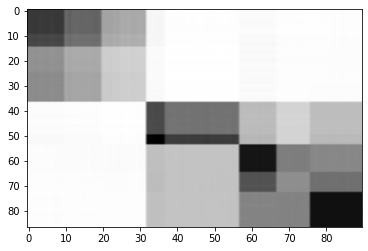

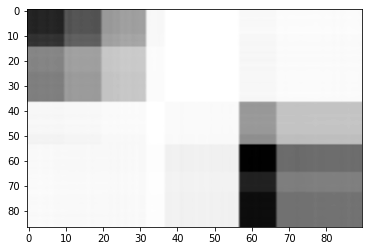

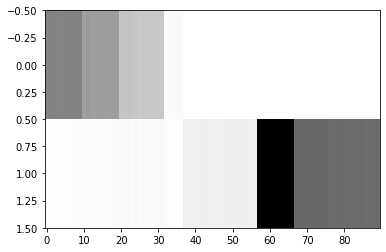

In [29]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

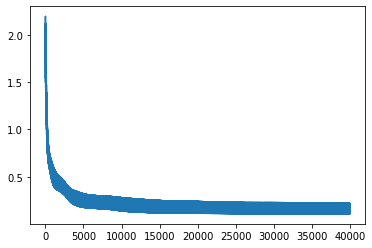

In [30]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer

In [31]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, L=L40, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.5987, dtype=torch.float64)
epoch =  2000 
 tensor(0.5987, dtype=torch.float64)
epoch =  3000 
 tensor(0.5987, dtype=torch.float64)
epoch =  4000 
 tensor(0.5987, dtype=torch.float64)
epoch =  5000 
 tensor(0.5987, dtype=torch.float64)
epoch =  6000 
 tensor(0.5987, dtype=torch.float64)
epoch =  7000 
 tensor(0.5987, dtype=torch.float64)
epoch =  8000 
 tensor(0.5987, dtype=torch.float64)
epoch =  9000 
 tensor(0.5987, dtype=torch.float64)
epoch =  10000 
 tensor(0.5987, dtype=torch.float64)


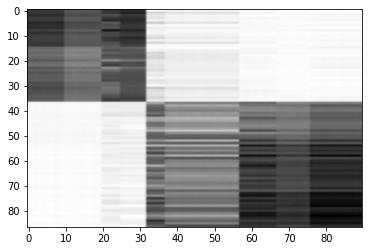

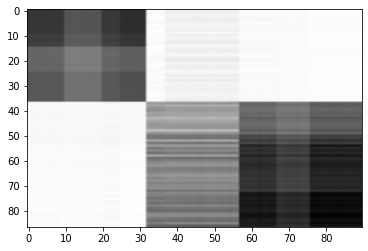

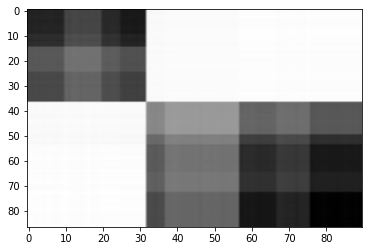

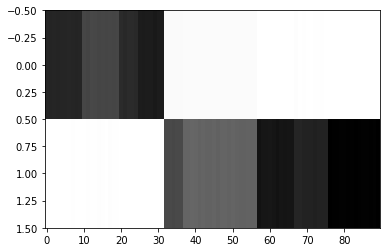

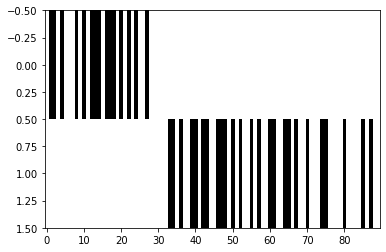

In [32]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L40*Y2,aspect='auto',cmap='binary')
plt.show()

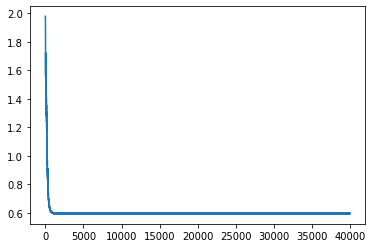

In [33]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer (Cross-Entropy)

In [34]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, L=L70, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.7813, dtype=torch.float64)
epoch =  2000 
 tensor(0.7643, dtype=torch.float64)
epoch =  3000 
 tensor(0.7586, dtype=torch.float64)
epoch =  4000 
 tensor(0.7558, dtype=torch.float64)
epoch =  5000 
 tensor(0.7542, dtype=torch.float64)
epoch =  6000 
 tensor(0.7530, dtype=torch.float64)
epoch =  7000 
 tensor(0.7522, dtype=torch.float64)
epoch =  8000 
 tensor(0.7516, dtype=torch.float64)
epoch =  9000 
 tensor(0.7511, dtype=torch.float64)
epoch =  10000 
 tensor(0.7507, dtype=torch.float64)


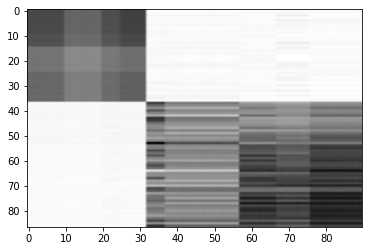

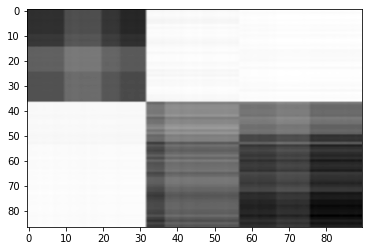

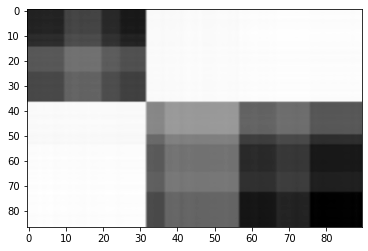

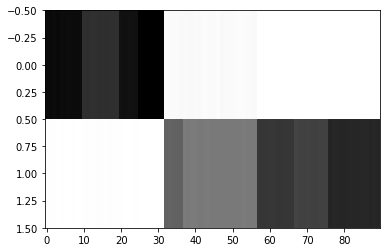

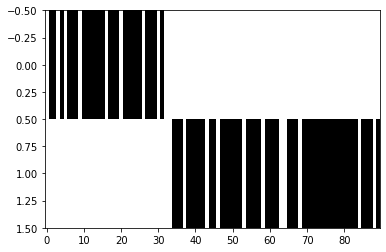

In [35]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L70*Y2,aspect='auto',cmap='binary')
plt.show()

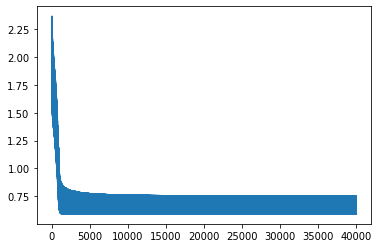

In [36]:
# plot the loss curve
history_supervised.plot_scalar('loss')